# Time Series

AM207: Pavlos Protopapas, Harvard University

April 1, 2016


------


Jellyfish production time series
<img src="http://upload.wikimedia.org/wikipedia/commons/e/ef/Jellyfish_production_time_series.png" width="480" height="360"/>
$$\newcommand{\E}[1]{\mathrm{E}[#1]}
\newcommand{\EE}[2]{\mathrm{E}_{#1}[#2]}
\newcommand{\V}[1]{\mathrm{V}[#1]}
\newcommand{\P}[1]{\mathrm{P}(#1)}
\newcommand{\AR}[1]{\mathrm{AR}(#1)}
\newcommand{\MA}[1]{\mathrm{MA}(#1)}
\newcommand{\ol}{\overline}
\newcommand{\N}[2]{\mathrm{N}(#1,\ #2)}$$

In [4]:
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
import seaborn as sns
import statsmodels.api as sm
import statsmodels.graphics.tsaplots as tsaplots
from IPython.display import Image

## 1. Foundational concepts in Time Series

### The Non-IID case

So far, we have concentrated on IID sets of data points. This assumption allowed us to express the likelihood function as the product over all data points of the probability distribution for each data point.

This is not always an assumption that holds. In particular, sequential data is a case where the assumption does not hold: for example rain today might portend more rain tomorrow. Other examples are nucleotide base pairs along a strand of DNA or the sequence of characters in an English sentence.

Indeed, you are very familiar with one such sequence: this is the chain obtained from doing MCMC. We do all kinds of manipulations there to remove any correlations to get random samples from a particular distribution.

### What is a Stochastic Process?

Indeed, more generally, lets define a stochastic process. A **Stochastic Process** is a
**a collection of random variables ordered in time**. It might be rain on successive days or the times in a 24 hour period when a baby was born. The variables may be iid or not. If they are not iid, it is precisely the dependence that we are interested on.

What we'd like to focus on here are processes evolving in time according to probabilistic laws, and deal only with well defined time lags: ie unique sampling frequency. Furthermore, we will concentrate on discrete univariate time series (for now).

### Ensemble

Our key assumption will be to regard the series as **ONE** realization of stochastic process from an ensemble of time series. Our notation $\E{X}$ is the usual frequentist $\EE{ensemble}{X}$ and similar for variance.

We want to make inferences about the process. 

First of all we note that, without loss of generality, we can use the product rule to express the joint distribution for a sequence of observations thus:

$$P(x_1, x_2,...,x_n) = \prod_{n=1}^{N} P(x_n | x_1 , x_2 , ... , x_{n-1} )$$

This is the distribution we'd like to learn. Indeed, specifically, we are interested in the ensemble quantities 

$$\mu_n = \E{x_n}$$

$$\sigma_n^2 = E[(x_n − \mu_n)^2] =\V{x_n}$$ 

and covariance 

$$   \gamma(x_{n},x_{n+k}) = E[(x_n − \mu_{n})(x_{n+k} − \mu_{n+k})] $$.

### Stationarity

It is useful to distinguish between stationary and non-stationary sequential distributions. In the stationary case, the data evolves in time, but the distribution from which it is generated remains the same. For the more complex non-stationary situation, the generative distribution itself is evolving with time. Here we shall focus on the stationary case.

We define  **Strongly stationary**: $\P{x_{1:k}} = \P{x_{t:t+k-1}}   \forall \,\,\,  k, t$: joint distribution of blocks of length $k$ is time-invariant. Implies $\mu_t = \mu$, $\gamma(x_{t},x_{t+k-1})=\gamma(k)$, the autocovariance at lag $k$. That is, the autocovariance only depends on the lag.

It may not seem surprising to suggest the notion of a distribution where the distribution is the same for such blocks, or more specifically, at all times. However, remember that many processes such as economies have equilibrium distributions far from the initial conditions.

We also define  **Loosely stationary**: $\E{x_1} = \E{x_t} = \mu  \,\,\, \forall t$ and $\gamma(x_{t},x_{t+k-1})=\gamma(k)$. There is no restriction on joint distributions. 

$$\mu_t = µ, \,\,\, t = 1, 2,...$$
$$ \sigma^2_t = σ^2, \,\,\, t = 1, 2,...$$
$$ \gamma(t,s) = \gamma(t−s), \,\,\, t \neq s,...$$

Loose is obviously implied by strong.



It is only for gaussian processes that Loose implies Strong. We'll come back to gaussian processes in  a later lecture.

Which of the following Time Series is stationary?

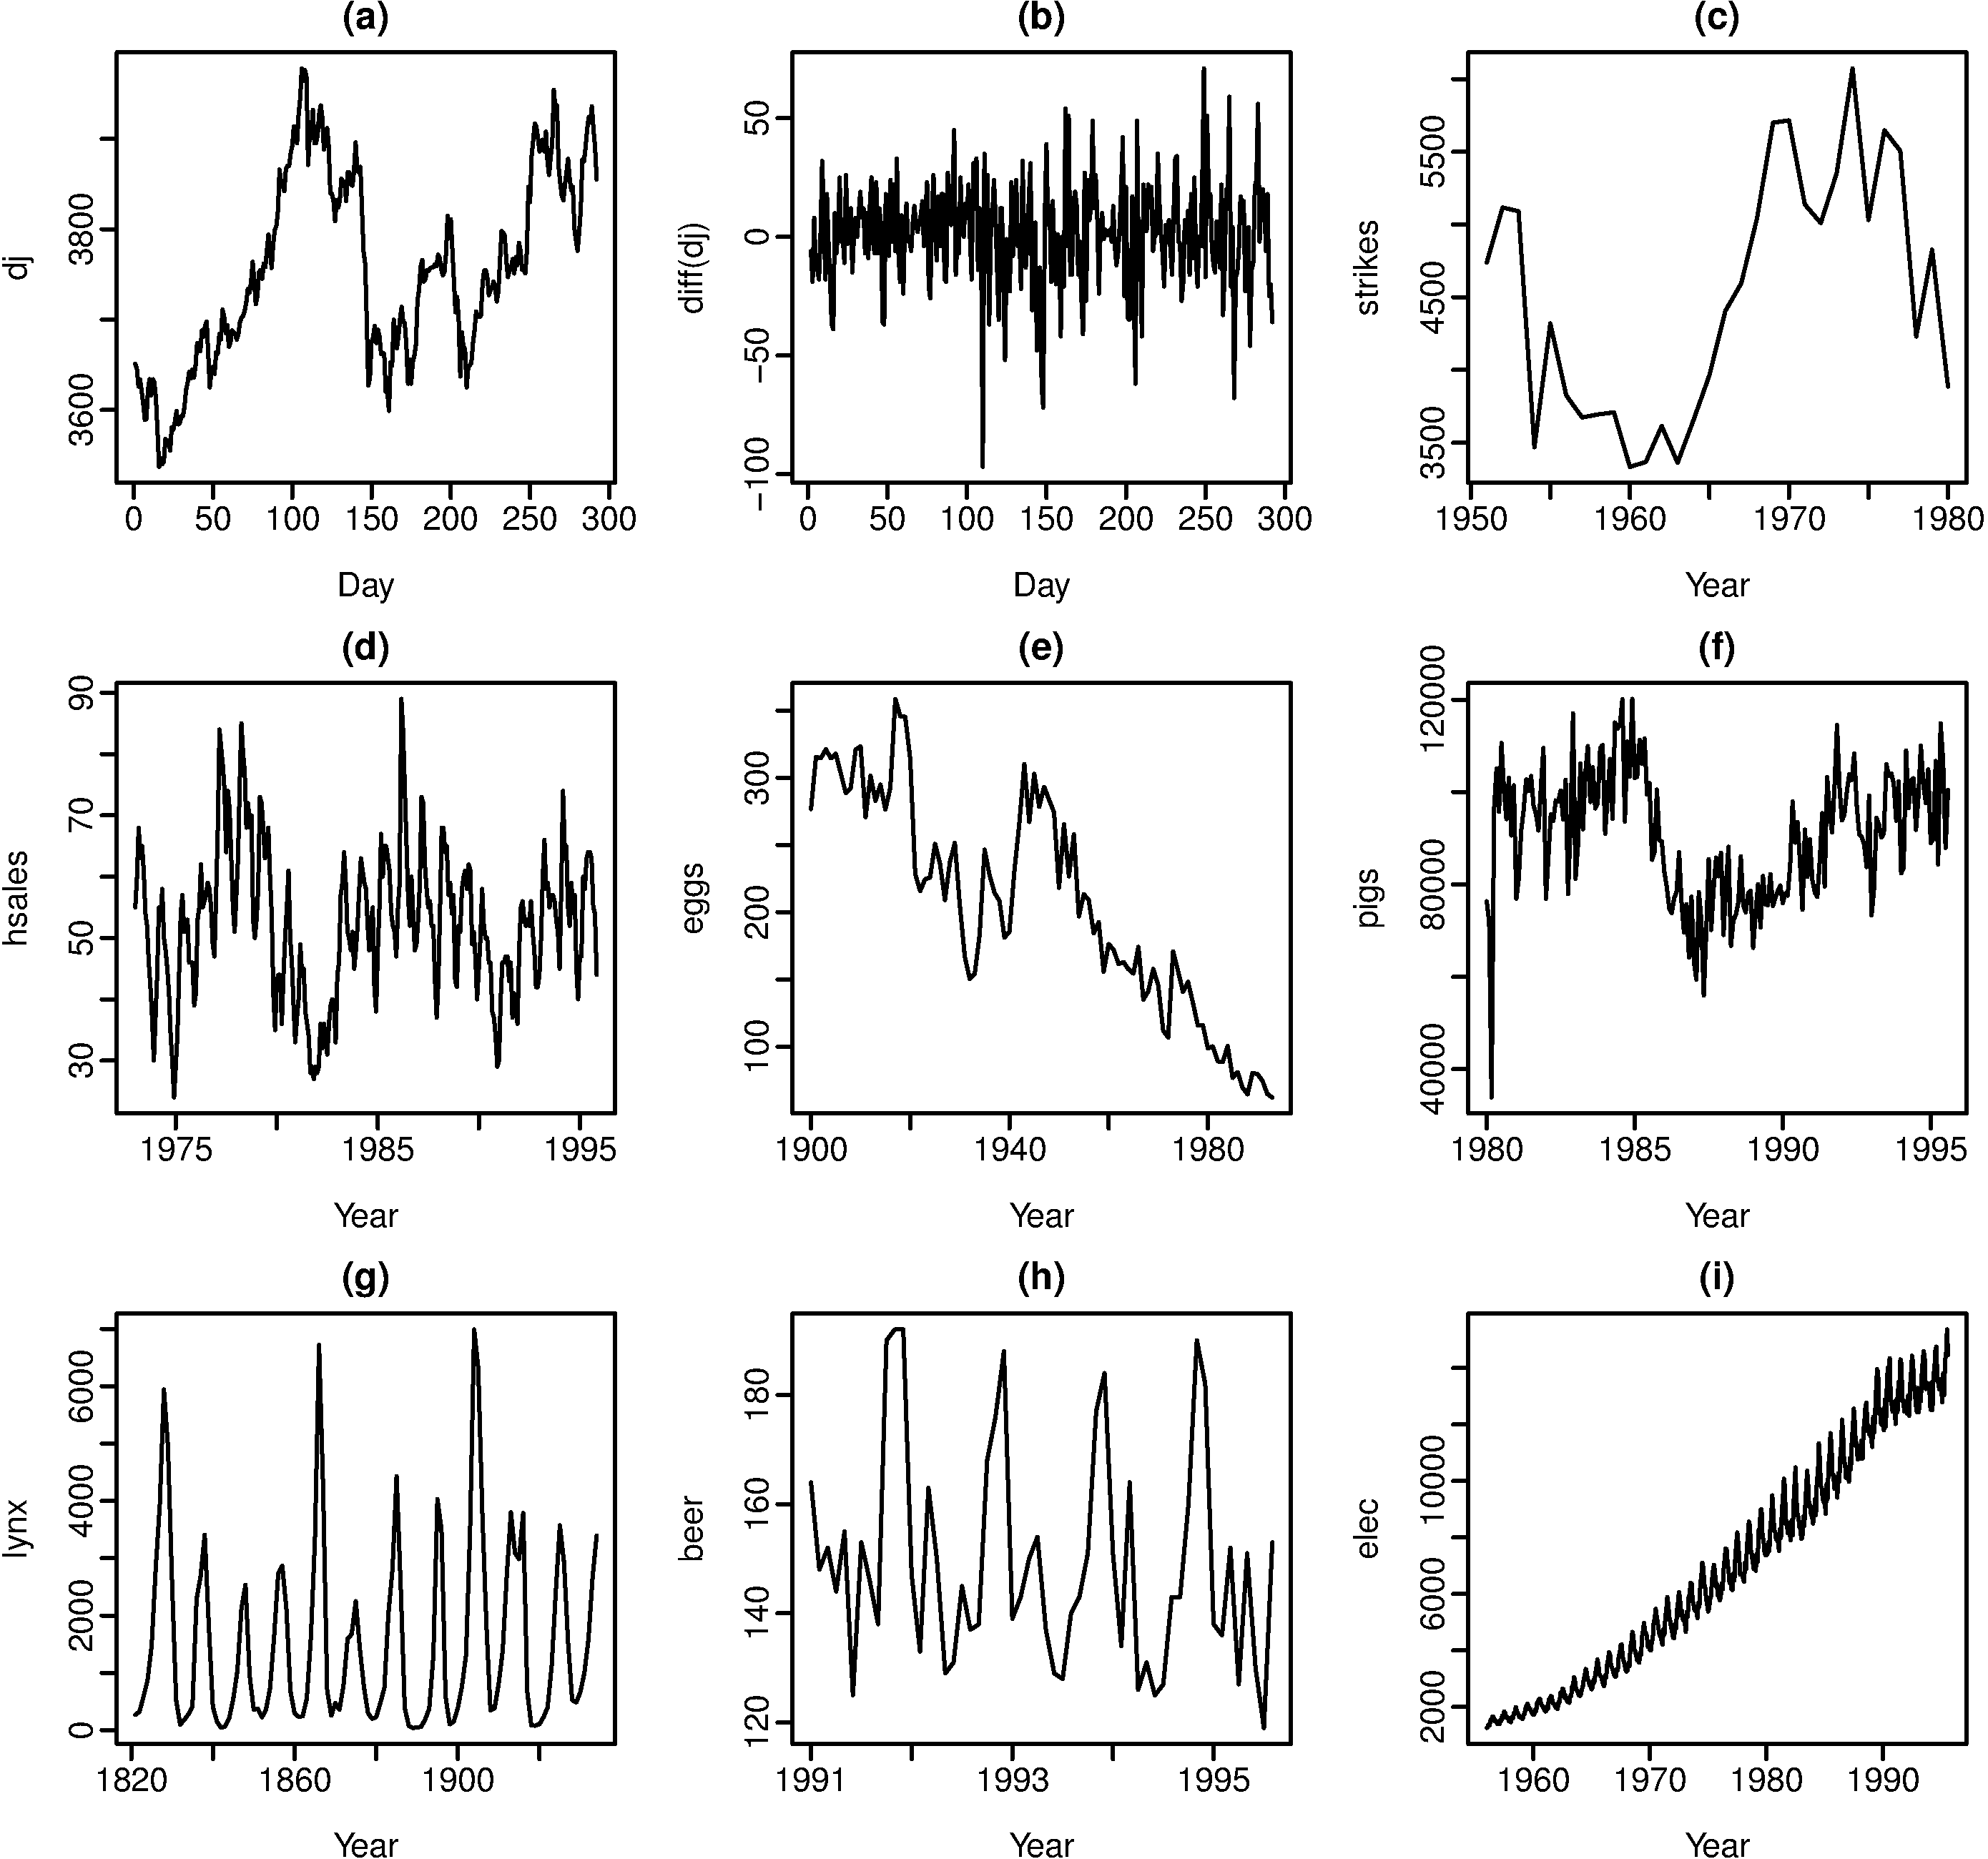

In [28]:
Image("stationary.png")

    (a) Dow Jones index on 292 consecutive days; (b) Daily change in Dow Jones index on 292 consecutive days; (c) Annual number of strikes in the US; (d) Monthly sales of new one-family houses sold in the US; (e) Price of a dozen eggs in the US (constant dollars); (f) Monthly total of pigs slaughtered in Victoria, Australia; (g) Annual total of lynx trapped in the McKenzie River district of north-west Canada; (h) Monthly Australian beer production; (i) Monthly Australian electricity production.
    
(b and g are stationary)

### Autocorrelation

Typically, in time series, there is some decay of  correlation: $x_n$ and $x_{n+k}$ become more and more nearly independent as $k \to \infty$. We study this by the covariance or autocovariance defined above, or equivalently by the  autocorrelation:



$$\rho(k) =\frac{\gamma(k)}{\gamma{(0)}}=\frac{E[(x_t-\mu)(x_{t+k}-\mu)]}{E[(x_t-\mu)(x_{t}-\mu)]}$$ 

A plot of $\rho_k$ against $k$ is know as the autocorrelogram or auto-correlation function
and is often a good guide to the properties of the series. In summary second order
stationarity implies that mean, variance and the autocorrelogram are independent
of time.

Autocorrelation is important, firstly, because everybody knows about it. Secondly, in the rather special case of Gaussian processes, it really does tell us everything we need to know (more on this in the lecture on Gaussian Processes). Third, in the somewhat less special case of linear prediction, it tells us everything we need to know. Finally, it plays an important role in understanding ergodicity, as we shall soon see.

### Markov

We are interested in $P(x_{t+1} \vert x_{1:t})$.  However, for finite correlation times, we lose memory after a while. This leads us to consider Markov models in which we assume that future predictions are independent of all but the most recent observations. That is, the process is Markovian of order $m$ steps. (In class we have so far dealt with $m = 1$.)

$$P(x_n | x_1 , x_2 , ... , x_{n-1} ) = P(x_n | x_{n-m}, x_{n-m+1},...,x_{n-1})$$

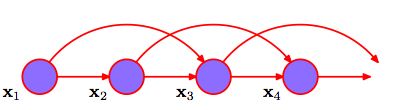

In [30]:
Image("m2o.png")

Such a process is a weakening of both i.i.d and deterministic (current state $x_t$ fixes entire future trajectory) dependence. Indeed such a chain only fixes *distribution over trajectories*. Current states are the only channel through which the past affects the future.

Although such models are tractable, they are also severely limited. We can obtain a more general framework, while still retaining tractability, by the introduction of latent variables. We shall study such "state space" models in the next lecture, concentrating on the limited direct Markov models in this lecture.


### Ergodicity


Using a single measurement at each time to estimate values of the unknown
parameters is only valid if the process is ergodic. Ergodicity is a mathematical
concept. In essence it means that observations which are suﬃciently far apart in
time are uncorrelated so that adding new observations gives extra information.
In other words if we can show that for long enough series the average, covariance converges to the ensemble average and variance then we can use a single time series to learn everything (everything here is the average and covariance).

With iid data, the ultimate basis of all our statistical inference is the law of large numbers, which tells that as $n \to \infty$,

$$\frac{1}{n} \sum_{i=1}^{n} x_i \to \E{x},$$

where the average is once again over the ensemble. For the non iid sequential case, as $n \to \infty$:

$$\E{\ol{x_n}} = \E{\frac{1}{n} \sum_{i=1}^{n} x_i }= \frac{1}{n} \sum_{i=1}^{n} \E{x_i} = \E{x} =  \mu$$

where $\ol{x_n} = \frac{1}{n} \sum_{i=1}^{n} x_i$ is the average of the first $n$ variables in a particular time (itself a random variable).

We can further show that, as $n \to \infty$:

$$\V{\ol{x_n}} \to 0 .$$

To prove this we need the condition $\gamma(\tau) \to 0$ for all $\tau$ greater than some finite lag $m$. i.e. **the correlation time is finite**

This can be written as:

$$\sum_{k=0}^{\infty} | \gamma(k) | = \gamma(0)\tau \lt \infty$$

\begin{eqnarray}
\V{\ol{x}_n} &=& \V{\frac{1}{n}\sum_{t=1}^{n} x_t}\\
&=& \frac{1}{n^2} \left[ \sum_{t=1}^{n} \V{x_t} +2 \sum_{t=1}^{n}\sum_{s=t+1}^{n} \gamma(x_t , x_s) \right]\\
&=& \frac{1}{n^2} \left[ n\gamma(0) + 2 \sum_{t=1}^{n}\sum_{s=t+1}^{n} \gamma(s-t)\right]\\
& \le & \frac{1}{n^2} \left[ n\gamma(0) + 2 \sum_{t=1}^{n}\sum_{s=t+1}^{n} | \gamma(s-t) |\right]\\
& \le & \frac{1}{n^2} \left[ n\gamma(0) + 2 \sum_{t=1}^{n}\sum_{h=1}^{n} | \gamma(h) |\right]\\
& \le & \frac{1}{n^2} \left[ n\gamma(0) + 2 \sum_{t=1}^{n}\sum_{h=1}^{\infty} | \gamma(h) |\right]\\
& = & \frac{\gamma(0)(1+2\tau)}{n}
\end{eqnarray}

Thus the variance goes to 0 as $n \to \infty$.

$\ol{x_n} \to \E{x}$ as $n \to \infty$


Since $\E{\ol{x_n}} \to  \E{x_1}$ and the variance $\V{\ol{x}_n} \to 0$ as $n \to \infty$, hence $\ol{x_n} \to \E{x_1}$ as $n \to \infty$ **exactly**, just as in the iid case.

What does this mean?

A single long time series, if stationary with finite correlation time, becomes representative of the whole data generating process, just like sampling an iid distribution represents the entire population. Thus the ergodic theorem tells us that we CAN learn about the stochastic process from empirical data. 

One can extend the ergodic theorem to time averages and ensemble expectations of well behaved functions and functions of blocks $f(X_{t:t+k})$:  thus it applies to joint and marginal probability distributions.

If $x_i$ were iid, or even just uncorrelated,

$$\V{\ol{x}_n} = \frac{\gamma(0)}{n}$$

exactly. Thus, our bound on the variance is larger by a factor of $(1 + 2\tau)$, which translates to an effective sample size:

$$ESS = \frac{n}{(1 + 2\tau)}$$

of independent data points. Notice to the similarity to the formula for effective sample size in the lecture on Gibbs sampling, which indeed can be obtained from one of the steps in this derivation.

### Autoregression

For continuous variables $x$, instead of trying to estimate the whole conditional distribution of $x_t$ , we can just look at its conditional expectation. This is a autoregression: $\E{x_t|x_{t-p:t-1}} = r(x_{1:p})$: if we think the process is Markov of order p, then of course there is no point in conditioning on more than p steps of the past when doing an autoregression. The correlation drop off which inclined us towards Markov approximations also make limited-order autoregressions attractive.

We can do linear, kernel, spline, additive..you name it...regression. We'll stick to linear as it is simple, fast to compute, and fast to converge.

### Linear Autoregression

Linear regression is when we use linear-Gaussian conditional distributions in which each $x_n$ has a Gaussian distribution whose mean is a linear function of its markov 'feeders'. If we want to predict $x_t$ as a linear combination of the last $p$ observations $x_{t-1},x_{t-2},...,x_{t-p}$, then the ideal coefficients $\vec{\beta}$ are

$$
	\vec{\beta} = \left ( \V{x_{t-p:t-1}} \right ) ^ {-1} \gamma (x_{t-p:t-1}, x_t)
$$

where $\V{x_{t-p:t-1}}$ is the variance-covariance matrix of that block, and $\gamma$ is a matrix of covariances.

Assuming stationarity, $\V{x_t}$ is constant in t, and so the common factor of the over-all variance goes away, and $\vec{\beta}$ could be written entirely in terms of the correlation function $\rho$. 

Ergodicity then allows us to estimate these coefficients by using time averages instead of ensemble averages.

## 2. An exploration of models and stationarity

### Purely Random Process

A purely random process is one in which $x_t = z_t$, where $\{z_t\}$ are iid. We could choose any distribution. 

Lets choose $\N{0}{\sigma^2}$, also called white noise.

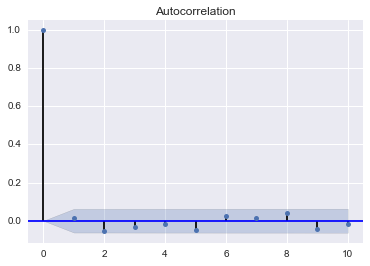

In [31]:
N=1000
#sigma=1
ts=np.random.randn(1000)
tsaplots.plot_acf(ts, lags=10);

Obviously, since the variables are iid, there is no autocorrelation.

Power spectrum

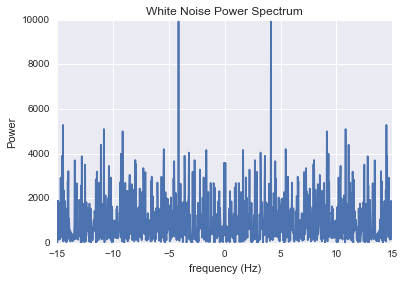

In [32]:
def powspec(samps):
    ps = np.abs(np.fft.fft(samps))**2
    time_step = 1. / 30. #assume Hertz
    freqs = np.fft.fftfreq(samps.size, time_step)
    idx = np.argsort(freqs)
    return freqs[idx], ps[idx]

def plot_powspec(samps, title):
    f,p = powspec(ts)
    plt.plot(f,p)
    plt.xlabel("frequency (Hz)")
    plt.ylabel("Power")
    plt.title(title+ " Power Spectrum")
    
plot_powspec(ts, "White Noise")

### Random Walk Model

Also known as Brownian motion, this is one of the simplest time series:

$$x_t = x_{t-1} + z_t$$

Note that since:

$$ \E{z} = 0$$
$$ \V{z} = \sigma_z^2 $$

Then 
$$\V{x_t} = t^2\, \sigma_z^2$$ this series is NOT stationary: a particle under brownian motion can get arbitrarily far from its start.

We can introduce the difference operator 

$$Dx_t = x_t - x_{t-1}  = z_t$$ 

The series given by applying the difference operator $D$ IS stationary. We saw this in the figure above where the DJI index itself isnt stationary, but its difference is.

Let us also introduce the backpropagation operator $B$: 

$$x_{t-1} = Bx_t$$

Then we can write:

\begin{eqnarray}
(1-B)x_t & = & z_t\\
x_t & = & \frac{z_t}{1-B}
\end{eqnarray}



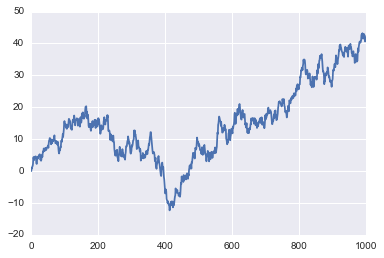

In [33]:
N=1000
z=np.random.randn(N)
x=np.zeros(N)
#we start with x_0=0
for i in np.arange(1,N,1):
    x[i] = x[i-1]+z[i]
plt.plot(x)

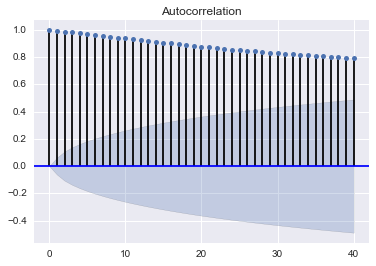

In [34]:
tsaplots.plot_acf(x, lags=40);

As you might expect, the autocorrelation does not go down in any reasonable amount of time. Indeed we can use the autocorrelation as a test for stationarity (except in pathological cases).

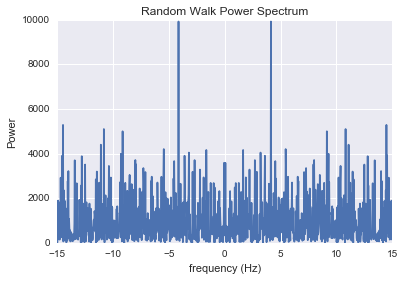

In [35]:
plot_powspec(x, "Random Walk")

### AR(1) model

This is the simplest autoregressive model: a markov chain of order 1, and $x_t$ be a white noise

$$ x_t =  \alpha x_{t-1} + z_t $$

$$ x_t = z_t + \alpha ( \alpha x_{t-2} +z_{t-1}) $$
$$ =  z_t + \alpha z_{t-1} + \alpha^2 x_{t-2}$$
$$ ... $$ 
$$ =  z_t + \alpha z_{t-1} + \alpha^2  z_{t-2} + \ldots $$


and if $\vert \alpha \vert < 1$ 
$$ \E{x_t} = 0 $$ 

which is independent of t





The random walk is a special case of an AR(1) model with $\alpha_1=1$.

Since $x_t = \frac{1}{1 - \alpha B} z_t $.

If we expand $\frac{1}{1 - \alpha B}$ in a series, we have:

$$\frac{1}{1 - \alpha B} = 1 + \alpha B +\alpha^2 B^2 + ...$$

and thus we also have:

$$x_t = z_t + \alpha z_{t-1} + \alpha^2 z_{t-2} + ...$$

The covariance is given by 

$$\begin{eqnarray} 
  \gamma(k) &=& \E{ x_t x_{t+k}}  \\
  & = & \sum_{i} \alpha^i \alpha^{k+i} \sigma_z^2  \\ 
  & = & \alpha^{k} \sigma^2_z \sum \alpha^{2i} 
  & =& \sigma^2_z \frac{\alpha^k}{1-\alpha^2} 
  \end{eqnarray} $$
  
 For the last step we used the geometric series formula.
 
 The autocorrelation is $ \rho(k) = \frac{\gamma(k)}{\gamma(0)}$ and therefore
 
 $$ \rho(k) = \alpha^k $$ 


In [44]:
def ts_gen_ar1(size, sigma, alpha1, c):
    e=sigma*np.random.randn(size)
    x=np.zeros(size)
    for i in np.arange(1,size,1):
        x[i] = c+alpha1*x[i-1] + e[i]
    #print x
    return x

**AR(1)**: $x_t = 0.3x_{t-1} + z_t$: STATIONARY

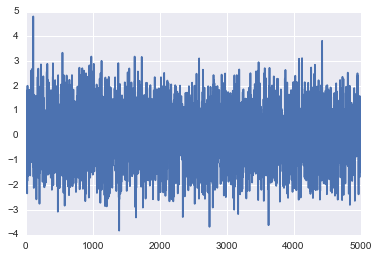

In [45]:
ts1 = ts_gen_ar1(5000, 1., 0.3,0)
plt.plot(ts1);

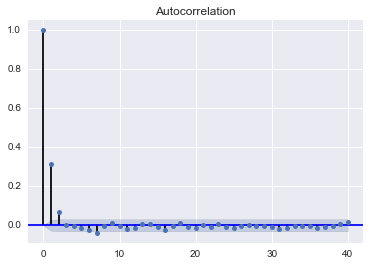

In [46]:
tsaplots.plot_acf(ts1, lags=40);

**AR(1)**: $x_t = -0.3x_{t-1} + z_t$: STATIONARY

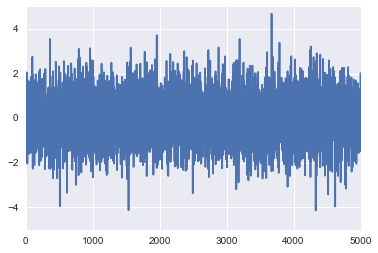

In [48]:
ts1b = ts_gen_ar1(5000, 1., -0.3, 0)
plt.plot(ts1b);

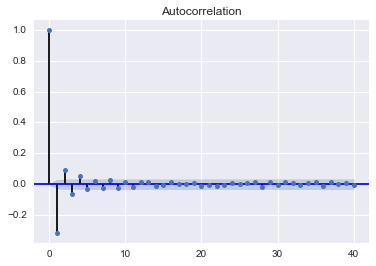

In [49]:
tsaplots.plot_acf(ts1b, lags=40);

See the negative terms that come from the $\alpha_1^k$ term in the ACF.

**AR(1)**: $x_t = 1.1x_{t-1} + z_t$: NON-STATIONARY

In [56]:
ts2 = ts_gen_ar1(1000, 1., 1.1, 0)

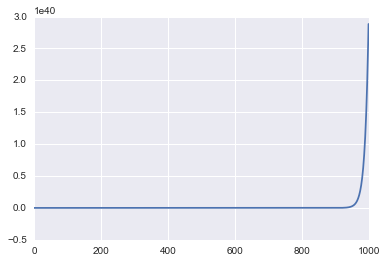

In [57]:
plt.plot(ts2)

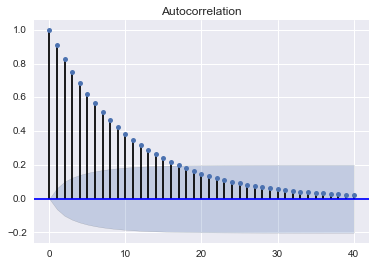

In [58]:
tsaplots.plot_acf(ts2, lags=40);

### MA(1) and MA(q) Models

Before we move on to higher order autoregressive models, lets briefly consider a class of models called Moving-Average, or MA models. The reason to do this is the technology we develop here, in conjunction with the notation developed above, will help us understand the structure of AR models.

The general MA(q) model is:

$$ x_t =  z_t + \beta_1 z_{t-1} + ... + \beta_q z_{t-q} $$

In terms of the back-propogation operator B we can thus write:

$$\MA{B} = 1 + \beta_1 B + \beta_2 B^2 + ... + \beta_q B^q$$

and thus

$$x_t = \MA{B} z_t$$

We do not observe $z_t$, so this is not regression in normal sense. Notice that $x_t$ can be thought of as weighted moving averages of the past few forecast errors.

Obviously, for MA(q): $\E{x_t} =0$, and $\V{x_t} = \sigma_z^2 \sum_{i=0}^q \beta_i^2$.

The MA(q) model is stationary for all finite q (indeed, for the gaussian case described above, the model is strongly stationary).

The covariance for the MA(q) model is 0 for $k > q$. This is as, there are no squared $z_t$ noise terms in the products of type $x_{t}x_{t-k}$ where $k \gt q$ (i.e. more than q-separated $x_t$). Since the noise itself is iid, the autocovariance is then 0. For $k \le q$:

$$  \gamma(k) = \sigma_Z^2 \sum_{i=0}^{q-k} \beta_i \beta_{i+k} $$

Thus 

$$\rho_k = \frac{\sum_{i=0}^{q-k} \beta_i \beta_{i+k}}{\sum_{i=0}^q \beta_i^2}$$

for $k \le q$ and 0 otherwise.

Let us briefly consider a MA(1) model:

$$x_t = z_t + \beta_1 z_{t-1}$$

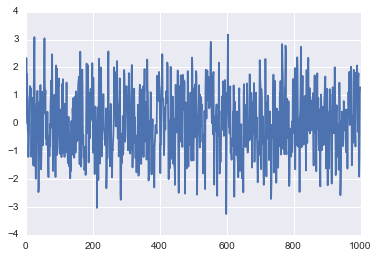

In [61]:
N=1000
x=np.zeros(N)
z=np.random.randn(N)
beta1=0.5
for i in np.arange(1,N,1):
    x[i] = z[i] + beta1*z[i-1]
plt.plot(x);

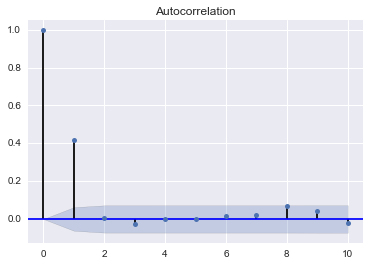

In [62]:
tsaplots.plot_acf(x, lags=10);

Clearly, the autocorrelation goes to 0 after one lag.

We will consider the MA(q) in more detail soon, but lets get back to autoregressive models.

### The AR(2) Model


$$ X_t =  \alpha_1 X_{t-1} + \alpha_2 X_{t-2} + z_t $$






Just like in the AR(1) case, we can use the $\alpha$s to study the stationarity of the AR(2) series. 

We write this as a function of the $B$ operators 

$$    (1-\alpha_1 B - \alpha_2 B^2) \, x_t = z_t $$

We'll call such a polynomial on the left side $\AR{B}$ and thus:

$$\AR{B} x_t = z_t$$

Lets write this as: 
$$ x_t = \psi(B) z_t = (1+\psi_1 B + \psi_2 B^2 + \ldots) z_t  = (1 + \sum_{i=1}^{\infty} \psi_i B^i) z_t $$ 

Thus

$$ (\AR{B})^{-1}  = (1 + \sum_{i=1}^{\infty} \psi_i B^i) z_t$$

or 

$$ (1-\alpha_1 B - \alpha_2 B^2) (1+\psi_1 B + \psi_2 B^2+ \ldots) = 1 $$

Equating coefficients to zero we thus get an infinite series of equations that we can use to relate to an infinite order MA process (see below). For now we want to know when this is stationary (a finite order MA process is stationary, but there are no guarantees on an infinite order). 

(Note that the infinite order geometric series we got from the previous AR(1) expansion is just an example of a simple infinite order MA series :-))

Lets look at the roots of 
$$ (1- \alpha_1 B - \alpha_2 B^2) $$

we can write the equation as 

$$ (1-g_1 B) (1-g_2 B) =0 $$ 

The roots are $1/g_1$ and $1/g_2$.

The process is stationary (to see this fix all the other factors and expand any one) if $\vert g_1 \vert < 1$ and $\vert g_2 \vert < 1$ which you can show (solve the quadratic equation!) impose the following condition on $\alpha_1$ and $\alpha_2$. 

\begin{eqnarray} 
   \alpha_1 + \alpha_2 &<&1 \\
   -\alpha_1 + \alpha_2 &<&1 \\
   -1< \alpha_2 &<&1 \\
\end{eqnarray}


In [69]:
Image("ar2st.png")

### Generalize to AR(p)

We can generalize to AR(P) models. Here we have:

$$ x_t =  \alpha_1 X_{t-1} + ... + \alpha_p X_{t-p} + Z_t $$

Such series arise in many econometric situations: prediction os inflation, imports, exports, etc: wherever there is some memory in the process. 

In the notation we established earlier, we may write \AR{B} = 1 - \alpha_1 B - \alpha_2 B^2 + ... - \alpha_p B^p$

and thus

$$ \AR{B} x_t = z_t.$$

We have, for  AR(p): $\E{X_t} =0$ . $\V{X_t} = \sigma_z^2 \sum_{i=0}^{\infty} \beta_i^2$, where the $\beta$'s are coefficients of the expansion of $\frac{1}{\AR{B}}$, an infinite MA process. 

The covariance in AR(p) is the infinite sum for the appropriate MA($\infty$):

$$  \gamma(k) = \sigma_z^2 \sum_{i=0}^{\infty} \beta_i \beta_{i+k} $$

Just like in the AR(1) and AR(2) case, we can use the $\alpha$s or $\beta$s to study the stationarity of the AR(p) series. If we set

$$AR(B)=0$$

where we treat B as a complex variable rather than as an operator, then the equivalent of the geometric series convergence criterion can be obtained by expanding the polynomial:

$$AR(B) = (1-g_1 B) (1-g_2 B)...(1-g_p B).$$

Thus the roots of this polynomial with B treated as a complex variable are $g_i^{-1}$.

Since the polynomial is in the denominator, similar conditions hold as for the AR(1) and AR(2) case:

**$|g_i| < 1$ for ALL $i=1..p$, or in other words $g_i^{-1}$, or the roots of the AR(B) polynomial, ALL lie outside the unit circle**

Lest you think these considerations of stationarity are merely academic, I will point you to a fascinating discussion on unit roots, and whether the US economy has a structural weakness [here](http://www.separatinghyperplanes.com/2012/10/mankiw-fails-to-understand-unit-roots.html).

Python's `statsmodels` project provides support for generating an AR(p) model (I encourage you to study the documentation (http://statsmodels.sourceforge.net/devel/tsa.html) to see the various options).

In [70]:
from statsmodels.tsa.arima_process import arma_generate_sample
def gen_ar2(alpha1, alpha2, size):
    ar = [1, -alpha1, -alpha2]
    ma = [1.]
    return arma_generate_sample(ar, ma, size)

**AR(2)**: $x_t = 0.75x_{t-1} -0.125x_{t-2} + z_t$: STATIONARY, REAL ROOTS

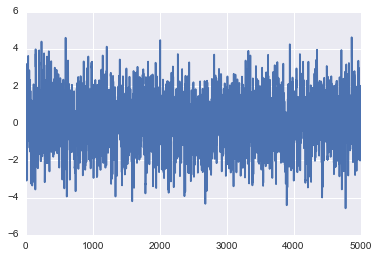

In [71]:
#roots 2 and 3
samps = gen_ar2(0.75, -0.125, 5000)
plt.plot(samps);

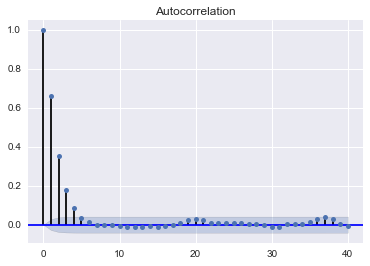

In [72]:
tsaplots.plot_acf(samps, lags=40);

**AR(2)**: $x_t = 15x_{t-1} -0.5x_{t-2} + z_t$: STATIONARY, COMPLEX ROOTS

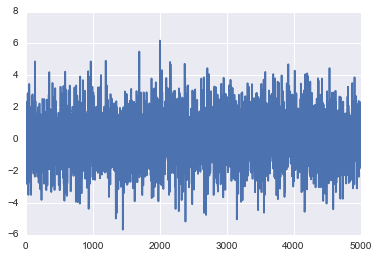

In [73]:
#roots 1 +/- i
samps = gen_ar2(1, -0.5, 5000)
plt.plot(samps);

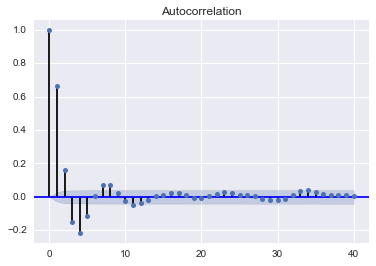

In [74]:
tsaplots.plot_acf(samps, lags=40);

**AR(2)**: $x_t = x_{t-1} -0.125x_{t-2} + z_t$: NON-STATIONARY, OSCILLATING

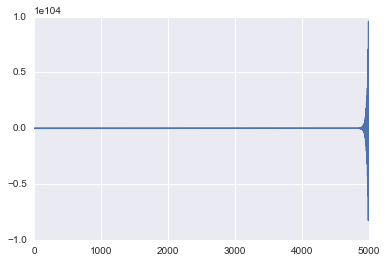

In [75]:
samps = gen_ar2(1, -1.1, 5000)
plt.plot(samps);

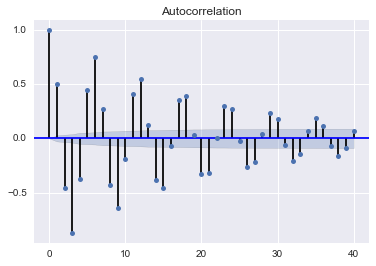

In [76]:
tsaplots.plot_acf(samps, lags=40);



### The partial autocorrelation function, or PACF.

Considering that all stationary AR(p) processes die out eventually, is there any way we can identify the order of the process. To do this we need a new concept—the Partial Autocorrelation function.

Consider a AR(2) or second order autoregressive markov process. There are two channels through which the current value is affected: the direct channel of the lag-2 value, and the effect of the lag-2 value through its effect on the lag-1 value. The PACF is used to measure only the direct effect.

To disentangle this, we need to estimate the regression coefficients of the present value on the past value in a series of AR models. For example, the co-efficient of the AR(1) model is the PACF at lag 1, the coefficient of the $x_{t-2}$ term in a AR(2) model is PACF(2), the coefficient of $x_{t-3}$ in an AR(3) is PACF(3) and so on.


In practice, the PACF is calculated from autocorrelations.

As an example, for AR(2), the autocorrelation function (ACF) can be derived as follows: Multiply the basic equation

$$ x_t - \alpha_1 x_{t-1} - \alpha_2 x_{t-2} = z_t $$

by $x_{t-k}$ and take expectations

$$
\begin{eqnarray}
\E{x_t \, x_{t-k} } - \alpha_1 \E{x_{t-1} x_{t-k}} - \alpha_2 \E{x_{t-2} x_{t-k}} &= &\E{x_{t-k} z_t} \\
\gamma(k) - \alpha_1 \gamma(k-1) -\alpha_2 \gamma(k-2) &=& 0 
\end{eqnarray}
$$

Lets generalize this:

Consider the AR(k) model equation from which we could estimate PACF(k):

$$x_t = a_{k1}x_{t-1}+...+a_{kk}x_{t-k} + z_k.$$

Notice I use $a_{k1}$ rather than $\alpha_1$ as this is not the real model, but rather an AR(k) model estimated. If we multiply both sides of this equation by ALL of $x_{t-1}$ ... $x_{t-k}$, take ensemble expectations, and divide by the variance of x, we get k equations:

\begin{eqnarray}
\rho_1 &=& a_{k1} + a_{k2}\rho_1 + ... a_{kk}\rho_{k-1}\\
\rho_2 &=& a_{k1}\rho_1 + a_{k2} + ... a_{kk}\rho_{k-2}\\
&...&\\
\rho_k &=& a_{k1}\rho_{k-1} + a_{k2}\rho_{k-2} + ... a_{kk}
\end{eqnarray}

These are called the Yule-Walker equations. We can use Cramer's rule on the matrix on the right hand side, which we shall call $R$, to solve these equations $\mathbf{R}\vec{a} = \mathbf{\rho}$. Here $\vec{a} = (a_{k1}, a_{k2},..., a_{kk})$ and $\mathbf{R}$ is the matrix of coefficients in the above set of simultaneous equations.


We get the solutions:

* For AR(1) we have estimate $a_{11} = \rho_1 = \alpha_1$, $a_{kk}=0$ for $k \gt 1$.
* For AR(2) we have estimate $a_{11} = \rho_1$ and $a_{22} = \frac{\rho_2 - \rho_1^2}{1 - \rho_1^2}$, $a_{kk}=0$ for $k\gt 2$
* For AR(p) we have $a_{kk} \ne 0$ for $k \le p$,$a_{kk}=0$ for $k\gt p$

We can see this for the models we used above:

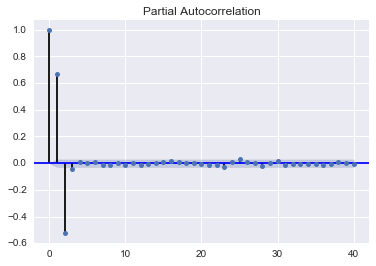

In [77]:
#Stationary AR(2)
tsaplots.plot_pacf(gen_ar2(1, -0.5, 5000), lags=40);

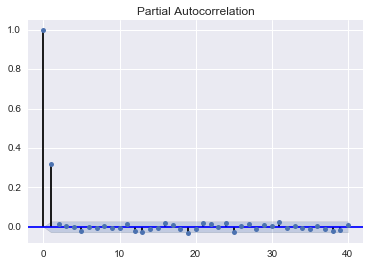

In [78]:
#Stationary AR(1)
tsaplots.plot_pacf(gen_ar2(0.3, 0, 5000), lags=40);

So we have ourselves a way to distinguish the order of the AR process. We will revisit the Yule-Walker equations in the context of inference; after all, with the exception of the synthetic models if different order we tried, it would seem that finding the regression coefficients is precisely what we are interested in.

Currently though let us return our attention to MA and other models.

## 3. Other Models

### MA(q) and invertibility

The general MA(q) is defined (as we saw before) by:

$$x_t = \MA{B} z_t$$

where

$$\MA{B} = 1 + \beta_1 B + \beta_2 B^2 + ... + \beta_q B^q$$

In symmetry with the case of the AR(p) process, we can see that if $\MA{B}$ has roots outside the unit circle, the MA(q) process is invertible. 

$$z_t = \frac{1}{\MA{B}} x_t$$

Then the MA(q) process has a AR($\infty$) representation.

What this means is that the $z_t$ can be described by a convergent sum of past and present $x_t$. Invertibility ensures a unique MA(q) process for a given ACF. This is important in choosing a MA series: there will be two equivalent ma series with the same ACF and we choose the invertible one.

Eg. $x_t = 2z_{t-1} + z_t$ and $x_t = 0.5z_{t-1} + z_t$ have the same ACF and PACF but we choose the latter as its root is outside the unit circle.

MA processes are very prevalent in econometrics, and are used to model economic indicators affected by random events such as strikes, shortages and so on. A MA(1) process represents 2 such random shocks, one now and one in the past. For a set of products in a grocery store, the number of active coupon campaigns introduced at different times would constitute multiple 'shocks' that affect the prices of the products in question.

Lets take up the example of MA(2)

In [79]:
def gen_ma2(beta1, beta2, size, sigma=1.0):
    ar = [1.]
    ma = [1., beta1, beta2]
    return arma_generate_sample(ar, ma, size, sigma=sigma)

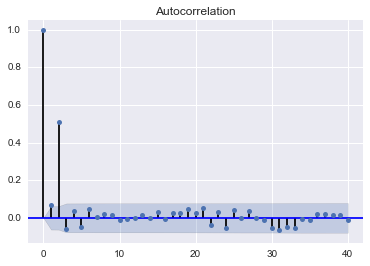

In [80]:
samps = gen_ma2(0.1,0.9,1000)
tsaplots.plot_acf(samps, lags=40);

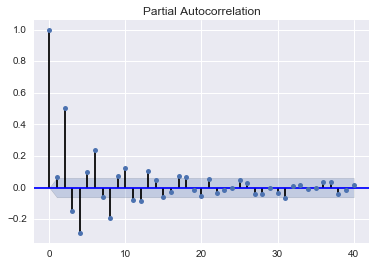

In [81]:
tsaplots.plot_pacf(samps, lags=40);

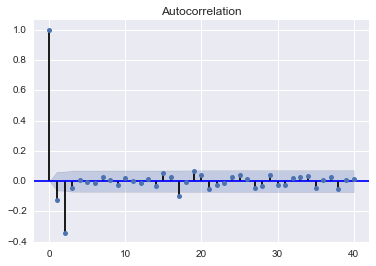

In [82]:
samps = gen_ma2(-0.5,-0.5,1000)
tsaplots.plot_acf(samps, lags=40);

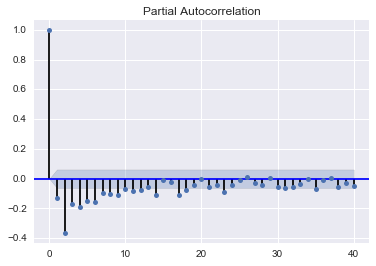

In [83]:
tsaplots.plot_pacf(samps, lags=40);

### ARMA(p,q) Model

ARMA(p, q) combines both AR and MA and is created to help with Occam's razor: what if we can fit by combining AR and MA with less coefficients:

$$ x_t = \alpha_1 x_{t-1} + ... + \alpha_{t-p} x_{t-p} + z_t + \beta_1 z_{t-1} + ... + \beta_q z_{t-q} $$

Defining $\AR{B}$ and $\MA{B}$ as before, we write:

$$ \AR{B}x_t = \MA{B}z_t ; x_t = \frac{\MA{B}}{\AR{B}}z_t $$.

For stationarity, the roots of $\AR{B}=0$ must lie outside the unit circle. Obviously, the model can be converted into pure MA or pure AR, depending upon roots and thus invert-ability.

The ACF of an ARMA(p, q) process is determined at greater lags by the AR(p) part of the process as MA part dies faster. Thus  the ACF consists of mixed damped exponentials and sine terms. Similarly the PACF of an ARMA (p,q) process is determined at greater lags by MA(q) and also consists of a mixture of damped exponentials and sine waves.

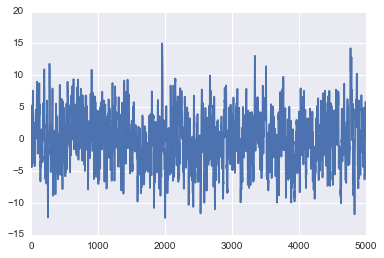

In [84]:
ar=[1, -0.9, 0.08]
ma=[1, 0.5, 0.9]
samps=arma_generate_sample(ar, ma, 5000)
plt.plot(samps);

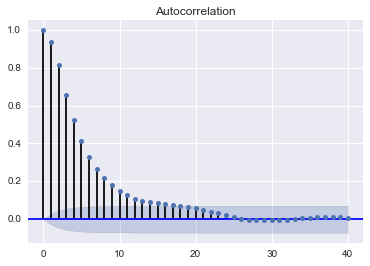

In [85]:
tsaplots.plot_acf(samps, lags=40);

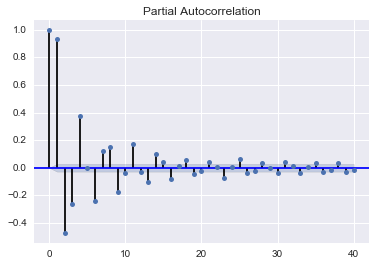

In [86]:
tsaplots.plot_pacf(samps, lags=40);

### ACF, PACF and estimation

<table>
<tr><th>MODEL</th><th>ACF</th><th>PACF</th></tr>
<tr><td>    AR(p) </td><td> Consists of damped exponential or sine waves, dies out exponentially </td><td> Is zero after p lags (can be spike at p)</td></tr>
<tr><td>    MA(q) </td><td> Is zero after q lags (can be spike at q) </td><td> Consists of mixtures of damped exponential or sine terms, dies out exponentially</td></tr>
<tr><td>    ARMA(p,q) </td><td> Eventually dominated by AR(p) part, then dies out exponentially </td><td> Eventually dominated by MA(q) part, then dies out </td></tr>
</table>

### ARIMA(p,d,q) Model

Many economic or other processes may not be generally stationary, so differencing is needed: we saw how the DJI itself isn't stationary, while its difference is. Such series are called integrated ARMA series of order d, or ARIMA(p,d,q).

Lets assume $w_t = D^d _t = (1-B)^d z_t$, where $w_t$ follows an ARMA(p,q) process, so, defining $\AR{B}$ and $\MA{B}$ as before, we have:

$$ \AR{B}w_t = \MA{B})z_t ; w_t = \frac{\MA{B}}{\AR{B}}z_t $$

$$ x_t = \frac{\MA{B}}{\AR{B}} \frac{1}{(1 - B)^d} Z_t $$

There are clearly $d$ roots on the unit circle, so in practice, given non-stationary data, we try and difference it to find the stationary set.

## 4. Inference and Prediction

### MLE

We focus on the general ARMA model, assuming that the difference operator has been applied to obtain an ARMA model from an ARIMA model.

Once we have established the order of a process using the ACF and PACF, we can use the maximum-likelihood estimator to get the coefficients of the time series. For this we note that the $z_t$ are all normally distributed and independent. [LIKELIHOOD IS HIDDEN SINCE IT IS A HOMEWR

In general, if we have competing models with different p and q we can use, for example, the Akake information criterion to hedge against overfitting: here we minimize $-2log(L) + 2(p+q+1)$ where the entire term in the parens is the number of parameters in the model. This complete minimization if often what is done in the estimation process.

We can also construct a fully bayesian analysis, the same concepts carry over from bayesian linear regression.

`statsmodels` makes it easy for us to do maximum likelihood fitting. Lets use it to fit an ARMA(2,2) model (our samples are generated from an ARMA(2,2). `statsmodels` also has tests for stationarity, invertibility, and all that jazz.

In [87]:
arma22 = sm.tsa.ARMA(samps, (2,2)).fit(method="mle")

In [88]:
#note the signs of the arparams are reversed compared to our definition
print(arma22.arparams)
print(arma22.maparams)

[ 0.90979837 -0.08967988]
[ 0.49979202  0.89189339]


In [89]:
arma22.aic

14222.856310131017

Lets fit a ARMA(2,1) to the model and check its AIC

In [91]:
arma21 = sm.tsa.ARMA(samps, (2,1)).fit(method="mle")
print(arma21.arparams)
print(arma21.maparams)
arma21.aic

[ 1.55029731 -0.63544317]
[-0.21448226]


16300.80278300052

As expected, the AIC is higher.

### The case of AR(p)

For an AR(p) series, this maximum likelihood estimator reduces to the least squares estimator, conditional on the first $p$ values of the time series being fixed:

$$ S = \sum_{t=p+1}^{N} \left ( X_t - \alpha_1 X_{t-1} - ... - \alpha_p X_{t-p} \right )^2 $$



As alluded to earlier, we can also use the Yule walker simultaneous difference equations to obtain an estimate the coefficients of an AR(p) series, usually of higher order than our model, so that we can obtain the desired ACF and PACF estimates. In matrix form we have $\mathbf{R} \vec{\alpha} = \mathbf{\rho}$ 

For an AR(2), we can use the Yule-Walker equations to estimate:

\begin{eqnarray}
\hat{\alpha_1} &=& \frac{\rho_1 (1 - \rho_2)}{1- \rho_1^2}\\
\hat{\alpha_2} &=& \frac{\rho_2 - \rho_1^2}{1- \rho_1^2}
\end{eqnarray}

One can show that for reasonably large N $\alpha$s agree with those obtained from MLE. For smaller N and series closer to non-stationarity they dont, as the matrix $\mathbf{R}$ becomes poorly conditioned.

### Prediction or Forecasting

We forecast by plugging in the values of the coefficients and computing future values of the time series. The first thing to do is just visual inspection to see if we have a reasonable fit. Alternatively we could do posterior predictive but that will come in the next few lectures. 

In [95]:
data=open("./lc_78.5855.788.B.mjd").readlines()
data = [e.strip().split() for e in data[3:]]
t = np.array([float(e[0]) for e in data])
f = np.array([float(e[1]) for e in data])
e = np.array([float(e[2]) for e in data])

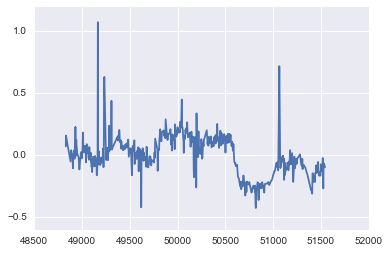

In [96]:
step = (t.max() - t.min())/t.shape[0]
times = np.arange(t.min(), t.max(), step)
fluxes = np.interp(times,t,f)
fluxes = fluxes - fluxes.mean()
plt.plot(times, fluxes);

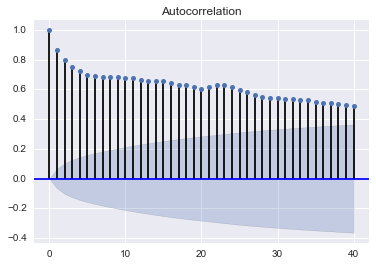

In [97]:
tsaplots.plot_acf(fluxes, lags=40);

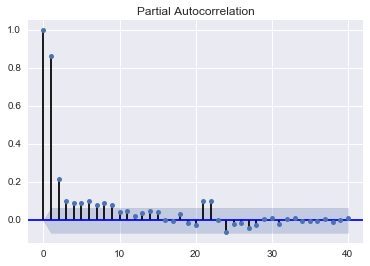

In [98]:
tsaplots.plot_pacf(fluxes, lags=40);

In [99]:
fluxes_train=fluxes[:700]
fluxes_test=fluxes[700:]

Fit and check the AIC's for the best model. It looks like a whole bunch of AR(p) processes will do:

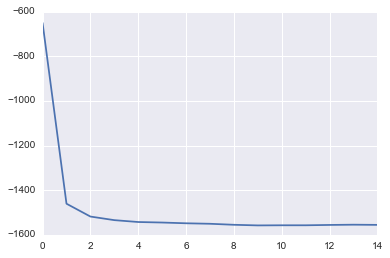

In [100]:
aics=np.zeros(15)
orders=range(15)
fits=[]
for j in orders:
    fit=sm.tsa.ARMA(fluxes_train, (j,0)).fit(method="mle")
    fits.append(fit)
    aics[j]=fit.aic
plt.plot(orders, aics);

In [101]:
aics

array([ -650.86107276, -1460.6788049 , -1518.21965581, -1534.32271782,
       -1542.73270875, -1545.03290121, -1548.41346636, -1550.59929528,
       -1555.13511839, -1557.92829601, -1557.34941916, -1557.37222612,
       -1555.82265655, -1554.68637896, -1555.50610144])

We test the gaussianity of the residuals: the departure is mainly in the tail.

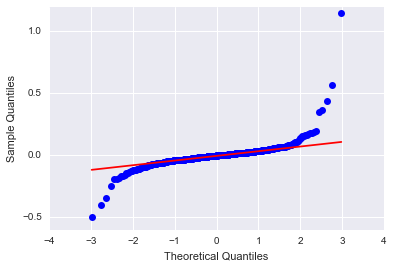

In [150]:
from statsmodels.graphics.api import qqplot
qqplot(fits[10].resid,line='q');

In [151]:
fits[10].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                  700
Model:                    ARMA(10, 0)   Log Likelihood                 790.675
Method:                           mle   S.D. of innovations              0.078
Date:                Thu, 24 Mar 2016   AIC                          -1557.349
Time:                        10:53:30   BIC                          -1502.736
Sample:                             0   HQIC                         -1536.238
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          0.0171      0.055      0.308      0.758        -0.092     0.126
ar.L1.y        0.4860      0.038     12.878      0.000         0.412     0.560
ar.L2.y        0.1425      0.042      3.400      0.001         0.060     0.225
ar.L3.y        0.0634      0.042      1.502      0.134        -0.019     0.146
ar.L4.y        0.0529      0.042      1.252      0.211        -0.030     0.136
ar.L5.y        0.0102      0.042      0.241      0.810        -0.073     0.093
ar.L6.y        0.0262      0.042      0.620      0.535        -0.057     0.109
ar.L7.y        0.0143      0.042      0.338      0.735        -0.068     0.097
ar.L8.y        0.0493      0.042      1.171      0.242        -0.033     0.132
ar.L9.y        0.0607      0.042      1.455      0.146        -0.021     0.143
ar.L10.y       0.0449      0.038      1.193      0.233        -0.029     0.119
                                    Roots                                     
==============================================================================
                  Real           Imaginary           Modulus         Frequency
------------------------------------------------------------------------------
AR.1             1.0166           -0.0000j            1.0166           -0.0000
AR.2             1.0159           -0.7065j            1.2374           -0.0967
AR.3             1.0159           +0.7065j            1.2374            0.0967
AR.4             0.3546           -1.3041j            1.3514           -0.2077
AR.5             0.3546           +1.3041j            1.3514            0.2077
AR.6            -0.5328           -1.3667j            1.4669           -0.3092
AR.7            -0.5328           +1.3667j            1.4669            0.3092
AR.8            -1.4852           -0.0000j            1.4852           -0.5000
AR.9            -1.2792           -0.9019j            1.5652           -0.4023
AR.10           -1.2792           +0.9019j            1.5652            0.4023
------------------------------------------------------------------------------
"""

We now engage in the predictive process:

In [104]:
index_rem=np.arange(700,900,1)
predicts=fits[10].predict(start=700, end=899)
in_predicts = fits[10].predict()

In [105]:
predicts.shape, index_rem.shape, in_predicts.shape

((200,), (200,), (700,))

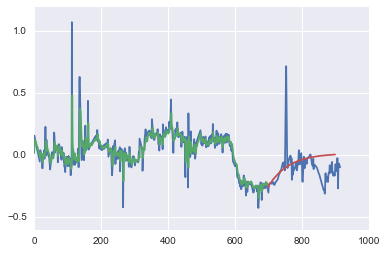

In [106]:
plt.plot(fluxes)
plt.plot(in_predicts)
plt.plot(index_rem, predicts)

We visually see that we get the trend roughly right. We must estimate the error bars, which we can do by bootstrapping or other means.

In general, to objectively evaluate our forecast, we must specify a cost function, like a mean squared error or a mean absolute error, on the test set. The MLE (or for AR(p), the least squares) process automatically does this for us on the training set, but this does not mean we have generalized well. However, this is why we use the AIC (or its cousin the BIC), or in a bayesian context, the evidence to pick the order (and parameters) of the model. `statsmodels` provides us a function for this for AR:

In [132]:
sm.tsa.AR(fluxes_train).select_order(ic='mle', trend='nc',maxlag=50)

TypeError: correlate() got an unexpected keyword argument 'old_behavior'

Note though that the relative flatness of the aic all the way out would suggest that we be parsimonious and choose a model of a much smaller order. As usual, dont leave your brain at home.

## 5. Putting it all together, the Box Jenkins procedure


1. Load the data.
2. Plot the sample ACF and PACF.
3. Difference the data, if needed.
4. Plot the sample ACF and PACF of the differenced series.
5. Specify and fit an ARIMA/ARMA/AR/MA model.
6. Check goodness of fit.
7. Generate forecasts.

Lets do this with a example included with MATLAB: the log quarterly Australian Consumer Price Index (CPI) measured from 1972 to 1991.


In [133]:
df=pd.read_csv("./AUSCPIALLQINMEI.csv")
df.head()

,DATE,VALUE
0,1955-01-01,6.763788
1,1955-04-01,6.867846
2,1955-07-01,6.867846
3,1955-10-01,6.971904
4,1956-01-01,6.971904


In [134]:
df.DATE = pd.to_datetime(df.DATE)
df.head()

,DATE,VALUE
0,1955-01-01,6.763788
1,1955-04-01,6.867846
2,1955-07-01,6.867846
3,1955-10-01,6.971904
4,1956-01-01,6.971904


In [135]:
dfsub=df[(df.DATE> '1971') & (df.DATE < '1990')]
dfsub.head()

,DATE,VALUE
65,1971-04-01,10.613944
66,1971-07-01,10.926119
67,1971-10-01,11.134235
68,1972-01-01,11.238293
69,1972-04-01,11.342352


In [136]:
dfsub=dfsub.set_index('DATE')
dfsub.head()

,VALUE
DATE,
1971-04-01,10.613944
1971-07-01,10.926119
1971-10-01,11.134235
1972-01-01,11.238293
1972-04-01,11.342352


In [137]:
cpi=dfsub.VALUE
cpi

DATE
1971-04-01    10.613944
1971-07-01    10.926119
1971-10-01    11.134235
1972-01-01    11.238293
1972-04-01    11.342352
1972-07-01    11.550468
1972-10-01    11.654527
1973-01-01    11.862643
1973-04-01    12.278876
1973-07-01    12.695109
1973-10-01    13.111342
1974-01-01    13.527575
1974-04-01    14.047867
1974-07-01    14.776275
1974-10-01    15.296566
1975-01-01    15.920916
1975-04-01    16.441207
1975-07-01    16.545265
1975-10-01    17.481790
1976-01-01    18.002081
1976-04-01    18.418314
1976-07-01    18.834547
1976-10-01    19.979188
1977-01-01    20.395421
1977-04-01    20.915713
1977-07-01    21.331946
1977-10-01    21.852237
1978-01-01    22.164412
1978-04-01    22.580645
1978-07-01    22.996878
                ...    
1982-07-01    33.922997
1982-10-01    34.963580
1983-01-01    35.691988
1983-04-01    36.420395
1983-07-01    37.044745
1983-10-01    37.981270
1984-01-01    37.773153
1984-04-01    37.877211
1984-07-01    38.397503
1984-10-01    38.917794
1985-01-01 

In [138]:
lcpi=np.log(cpi)

We start with the log of the Australian national CPI

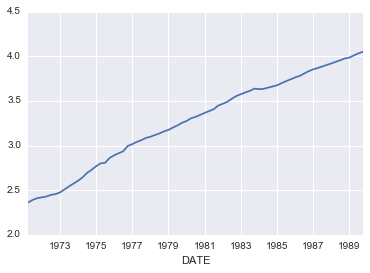

In [139]:
lcpi.plot()

Plot the sample autocorrelation function (ACF) and partial autocorrelation function (PACF) for the CPI series.

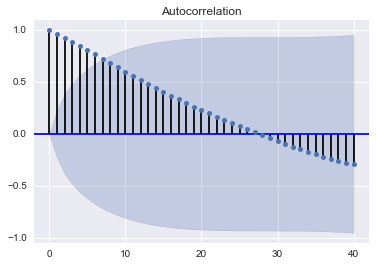

In [140]:
tsaplots.plot_acf(lcpi, lags=40);

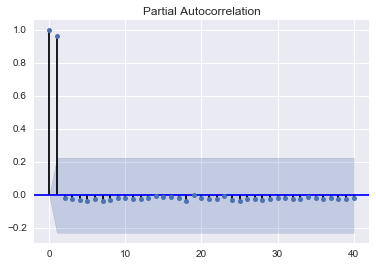

In [141]:
tsaplots.plot_pacf(lcpi, lags=40);

This suggests that we have some AR(2) business going on, at the very least. Lets remove the trend, and replot the ACF and PACF:

In [142]:
dcpi=lcpi.diff()[1:]
dcpi

DATE
1971-07-01    0.028988
1971-10-01    0.018868
1972-01-01    0.009302
1972-04-01    0.009217
1972-07-01    0.018182
1972-10-01    0.008969
1973-01-01    0.017700
1973-04-01    0.034486
1973-07-01    0.033336
1973-10-01    0.032261
1974-01-01    0.031253
1974-04-01    0.037740
1974-07-01    0.050552
1974-10-01    0.034606
1975-01-01    0.040005
1975-04-01    0.032157
1975-07-01    0.006309
1975-10-01    0.055060
1976-01-01    0.029328
1976-04-01    0.022858
1976-07-01    0.022347
1976-10-01    0.058998
1977-01-01    0.020619
1977-04-01    0.025190
1977-07-01    0.019705
1977-10-01    0.024098
1978-01-01    0.014185
1978-04-01    0.018605
1978-07-01    0.018265
1978-10-01    0.022372
                ...   
1982-07-01    0.034325
1982-10-01    0.030214
1983-01-01    0.020619
1983-04-01    0.020203
1983-07-01    0.016998
1983-10-01    0.024967
1984-01-01   -0.005495
1984-04-01    0.002751
1984-07-01    0.013643
1984-10-01    0.013459
1985-01-01    0.013280
1985-04-01    0.023469
1985-0

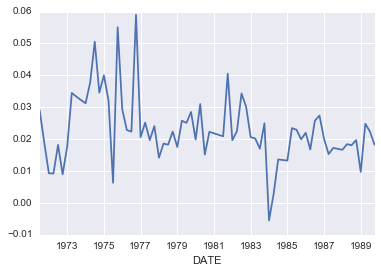

In [143]:
dcpi.plot()

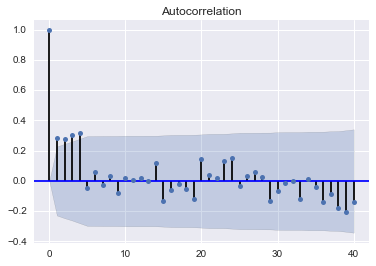

In [144]:
tsaplots.plot_acf(dcpi, lags=40);

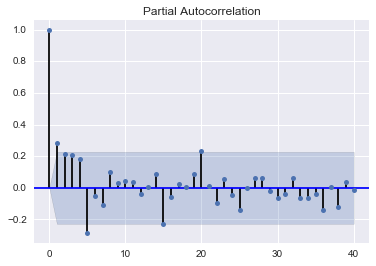

In [145]:
tsaplots.plot_pacf(dcpi, lags=40);

Ok, no trend, and the autocorrelation has also died down fast. The PACF is a bit muddled, but also dies fast, so lets stay with the AR(2), and now as we know, a 1-differencing, thus an ARIMA(2,1,0) for the log quarterly Australian CPI. This model has one degree of nonseasonal differencing and two AR lags. By default, the innovation distribution is Gaussian with a constant variance.

In [146]:
model = sm.tsa.ARIMA(lcpi, order=(2,1,0))
fit = model.fit(method="mle")

In [147]:
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.VALUE   No. Observations:                   74
Model:                 ARIMA(2, 1, 0)   Log Likelihood                 237.099
Method:                           mle   S.D. of innovations              0.010
Date:                Thu, 24 Mar 2016   AIC                           -466.199
Time:                        10:53:08   BIC                           -456.983
Sample:                    07-01-1971   HQIC                          -462.522
                         - 10-01-1989                                         
=================================================================================
                    coef    std err          z      P>|z|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------
const             0.0228      0.002     11.601      0.000         0.019     0.027
ar.L1.D.VALUE     0.2206      0.113      1.953      0.055        -0.001     0.442
ar.L2.D.VALUE     0.2079      0.113      1.846      0.069        -0.013     0.429
                                    Roots                                    
=============================================================================
                 Real           Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.7258           +0.0000j            1.7258            0.0000
AR.2           -2.7867           +0.0000j            2.7867            0.5000
-----------------------------------------------------------------------------
"""

In [148]:
fit.pvalues

const            4.702125e-18
ar.L1.D.VALUE    5.480245e-02
ar.L2.D.VALUE    6.901924e-02
dtype: float64

Both AR coefficients are significant at the 0.05 significance level. We look for the gaussianity and autocorrelation of the residuals.

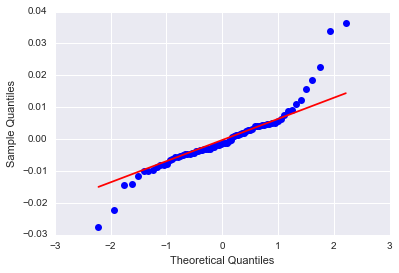

In [149]:
qqplot(fit.resid, line='q');

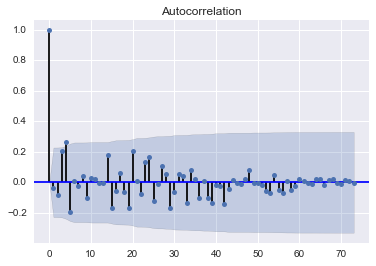

In [127]:
tsaplots.plot_acf(fit.resid);

Lets look at our in-sample prediction

/Users/pavlos/anaconda/envs/py35/lib/python3.5/site-packages/statsmodels/base/data.py:503: FutureWarning: TimeSeries is deprecated. Please use Series
  return TimeSeries(result, index=self.predict_dates)


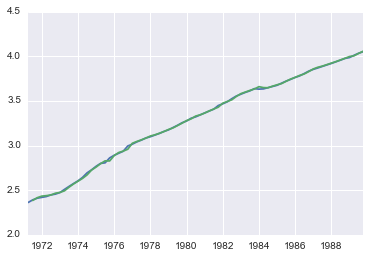

In [128]:
insample_predict=fit.predict(typ='levels')
plt.plot(lcpi)
plt.plot(insample_predict)

Generate forecasts and approximate 95% forecast intervals for the next 4 years (16 quarters).

In [129]:
start=lcpi.index.get_loc(pd.datetools.parse("1990-01-01"))
end = start + 48
print start, end


SyntaxError: Missing parentheses in call to 'print' (<ipython-input-129-ffebe999553a>, line 3)

In [130]:
ospredict=fit.predict(start=start, end=end, typ='levels')

NameError: name 'start' is not defined

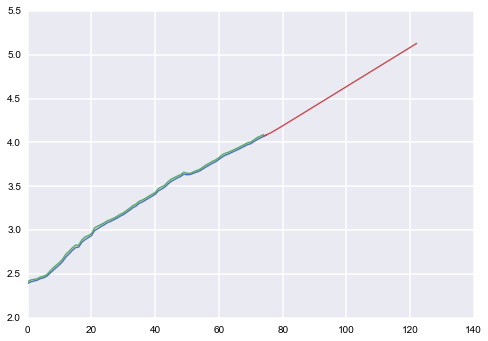

In [75]:
plt.plot(lcpi)
plt.plot(insample_predict)
plt.plot(np.arange(start,end+1,1), ospredict);

For some reason `statsmodels` does not give us confidence intervals for the ARIMA prediction, but it does for an AR when you pass `confint=True` to `predict`. We will leave this as an exercise.